# Assignment for Day 24:

# Project 2: Build Decision Tree for Attrition Rate Analysis( DV - "Attrition", IDV - Output of RF Algorithm )


## Exploratery Data Ananlysis
___Import Necessary Libraries___

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
DS_PATH="../datasets/general_data.csv"
def load_attrition_data(path=DS_PATH):
    return pd.read_csv(path)

___Load the attrition dataset___

In [3]:
attrition = load_attrition_data()

In [4]:
attrition.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

___There are some single direction variables on the dataframe which needs to be handled better___

In [6]:
attrition.Over18.value_counts()

Y    4410
Name: Over18, dtype: int64

In [7]:
attrition.StandardHours.value_counts()

8    4410
Name: StandardHours, dtype: int64

In [8]:
attrition.EmployeeID.value_counts()

2047    1
2632    1
2620    1
573     1
2624    1
       ..
1302    1
3347    1
1298    1
3343    1
2049    1
Name: EmployeeID, Length: 4410, dtype: int64

In [9]:
attrition.EmployeeCount.value_counts()

1    4410
Name: EmployeeCount, dtype: int64

___As these are unique variables which needs to be dropped off___

In [10]:
attrition.drop(columns=["Over18", "StandardHours", "EmployeeID", "EmployeeCount"], inplace=True)

___Lets plot histogram for understanding on the distribution___

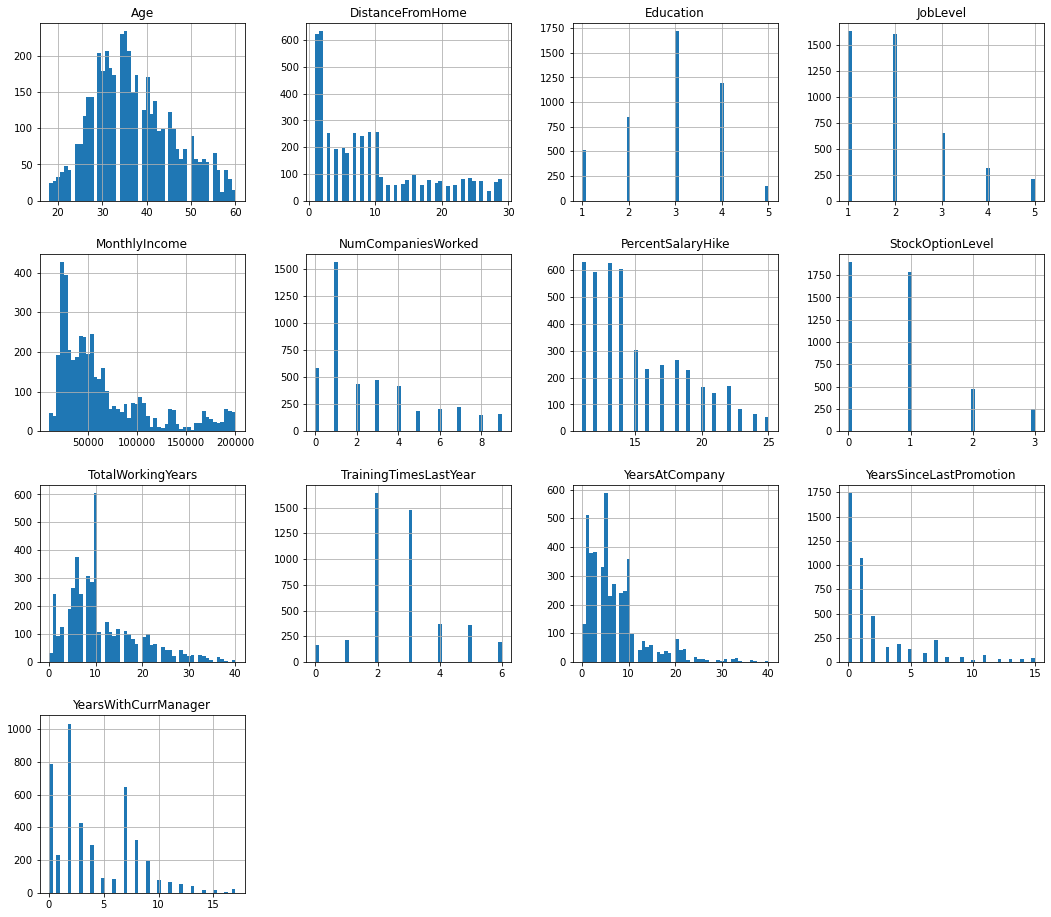

In [11]:
attrition.hist(bins=50, figsize=(18, 16));

___Lets plot the pairplot with the regression___

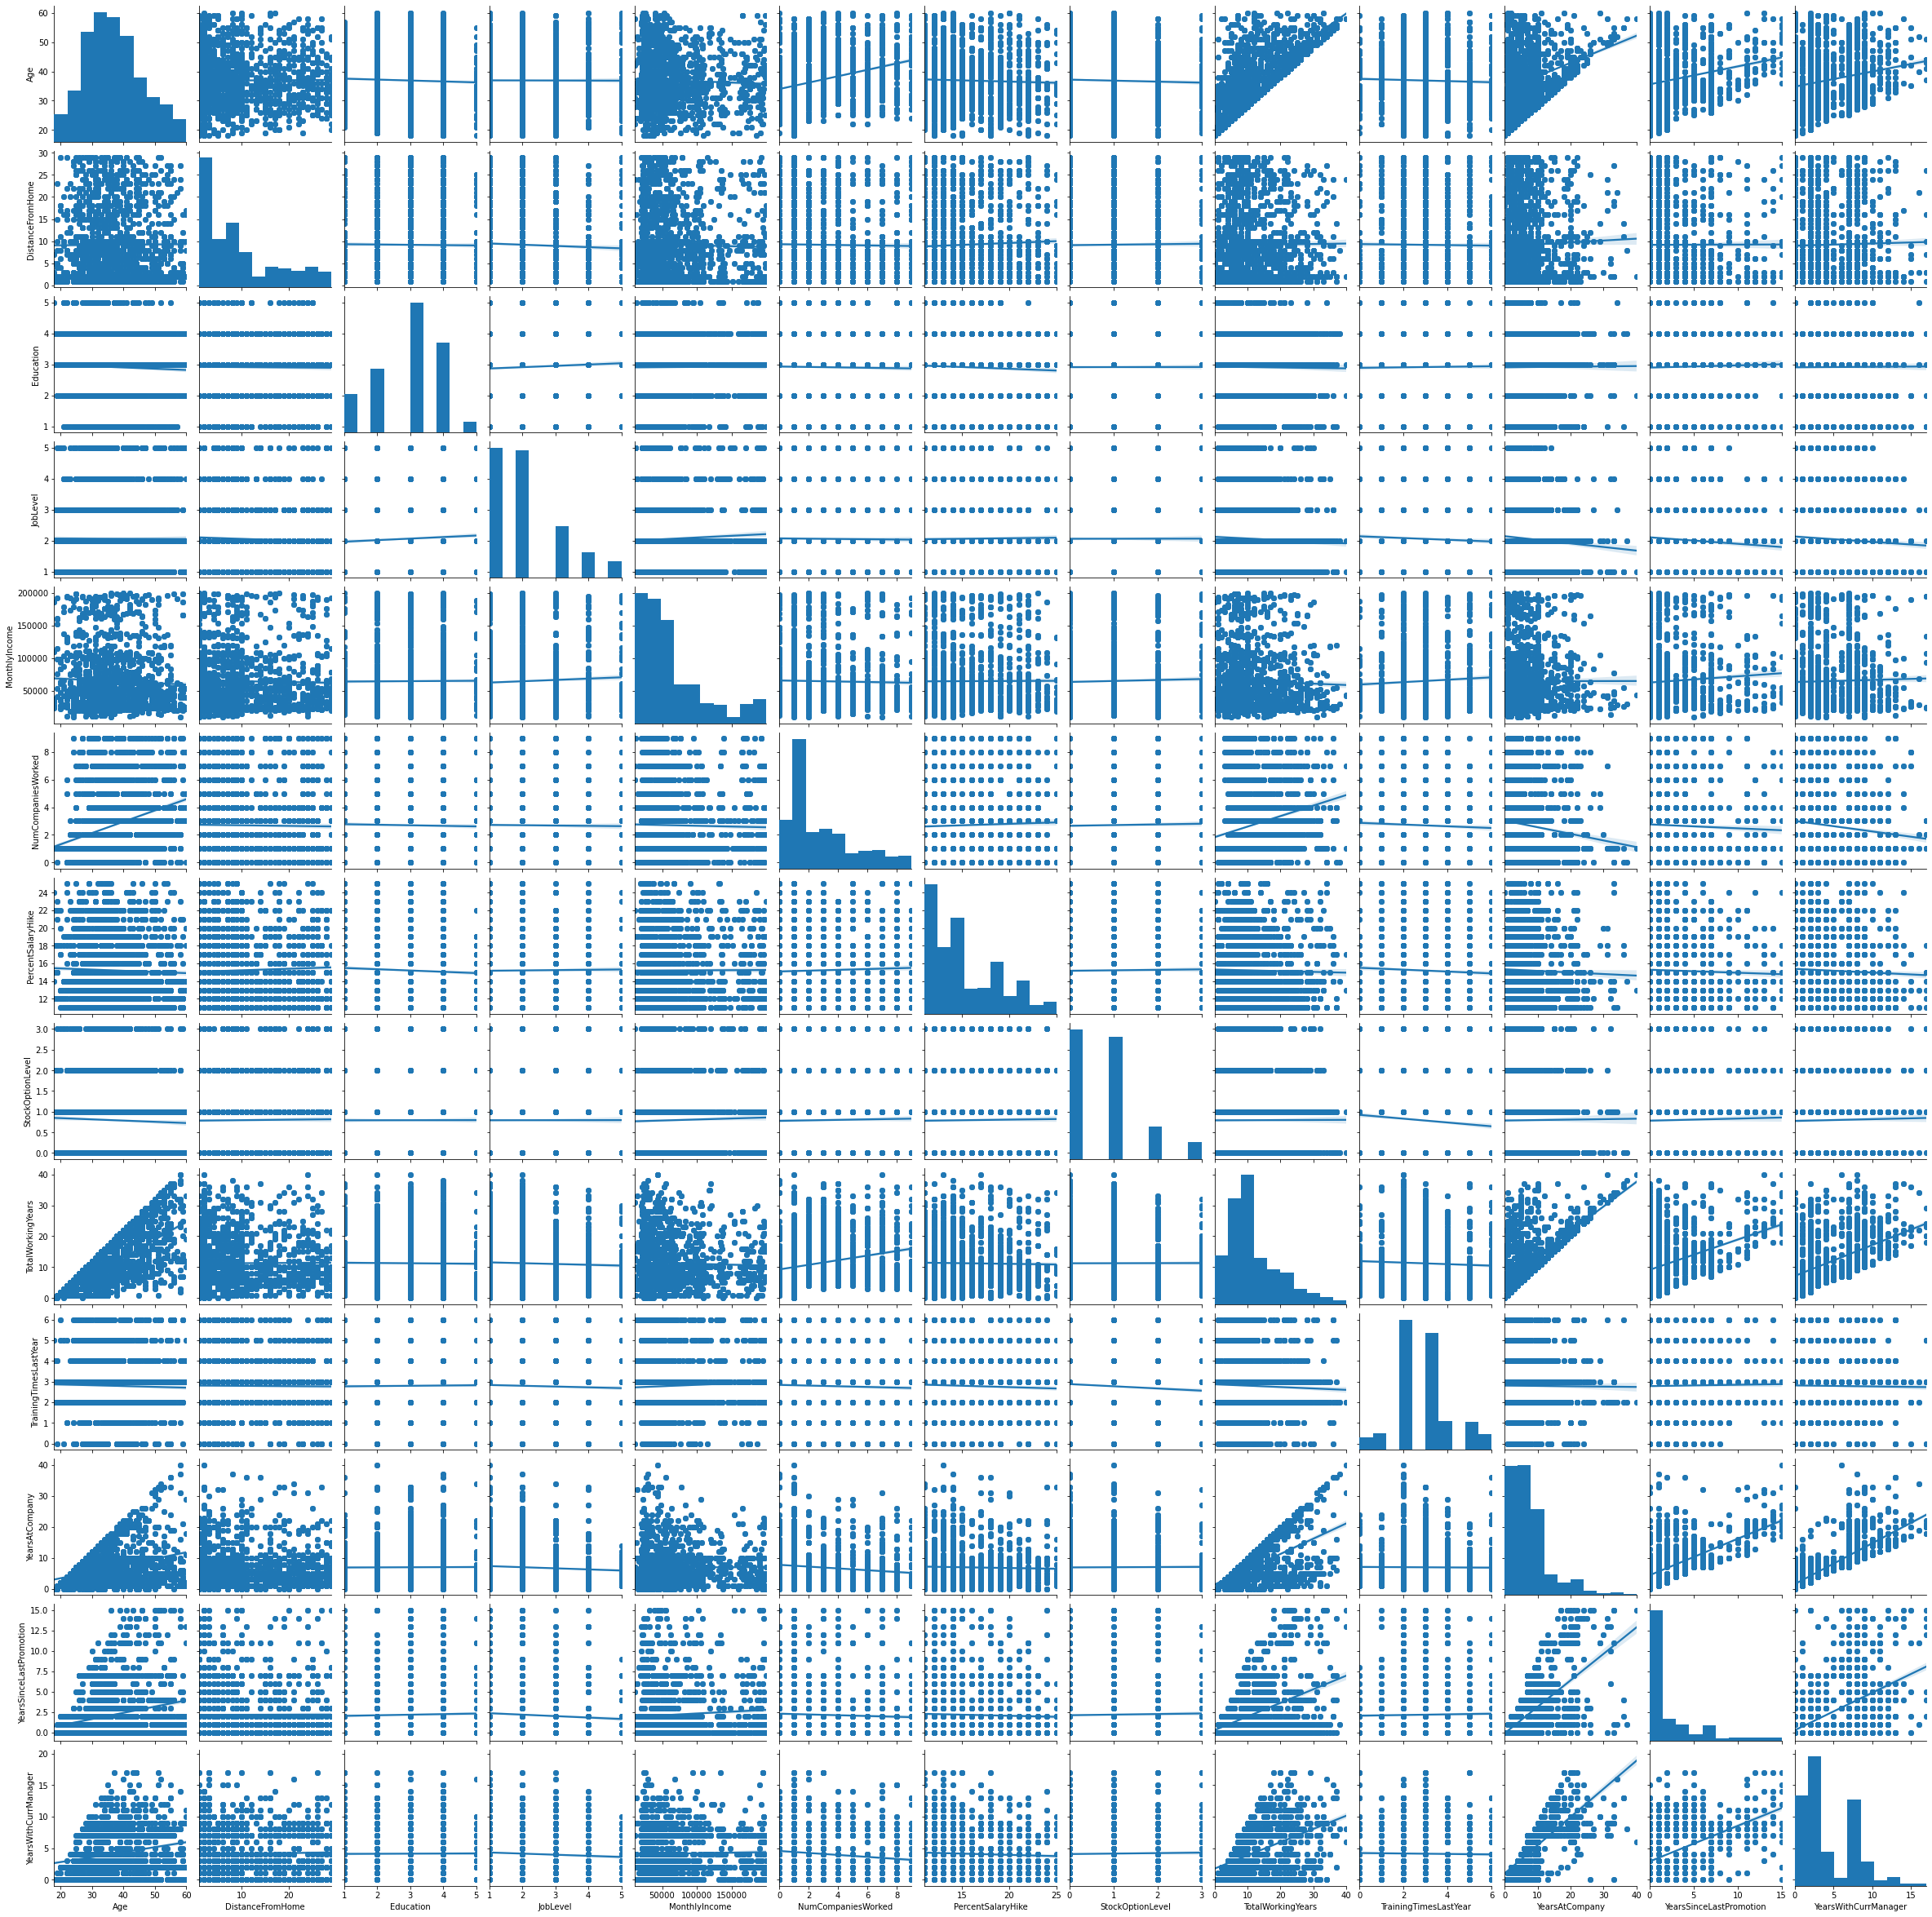

In [12]:
sns.pairplot(attrition, kind='reg')
plt.show();

### Split the data to training and test set

In [13]:
y = attrition.Attrition
X = attrition.drop(labels='Attrition', axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [16]:
X_train.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
2588,38,Travel_Rarely,Research & Development,3,4,Life Sciences,Female,1,Sales Representative,Divorced,44900,2.0,21,1,10.0,1,5,0,3
2354,45,Travel_Rarely,Sales,29,2,Technical Degree,Female,2,Research Scientist,Single,29730,1.0,12,0,10.0,2,10,1,4
655,45,Travel_Rarely,Human Resources,12,3,Human Resources,Male,2,Laboratory Technician,Single,43060,2.0,11,2,26.0,3,24,1,11
4339,55,Travel_Rarely,Research & Development,6,1,Life Sciences,Female,2,Laboratory Technician,Single,26550,8.0,17,0,36.0,0,24,2,15
3557,44,Travel_Rarely,Research & Development,3,4,Medical,Male,2,Research Scientist,Single,25640,1.0,12,3,20.0,3,20,13,17


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 2588 to 860
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3528 non-null   int64  
 1   BusinessTravel           3528 non-null   object 
 2   Department               3528 non-null   object 
 3   DistanceFromHome         3528 non-null   int64  
 4   Education                3528 non-null   int64  
 5   EducationField           3528 non-null   object 
 6   Gender                   3528 non-null   object 
 7   JobLevel                 3528 non-null   int64  
 8   JobRole                  3528 non-null   object 
 9   MaritalStatus            3528 non-null   object 
 10  MonthlyIncome            3528 non-null   int64  
 11  NumCompaniesWorked       3512 non-null   float64
 12  PercentSalaryHike        3528 non-null   int64  
 13  StockOptionLevel         3528 non-null   int64  
 14  TotalWorkingYears     

### Define the Pipeline for the data processing

In [18]:
def prepare_attrition(data):
    numer_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])
    
    num_attrib = ["Age", "DistanceFromHome", "Education", "JobLevel", "MonthlyIncome", "NumCompaniesWorked", 
                  "PercentSalaryHike", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", 
                  "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager"]
    cat_col = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus"]
    
    full_pipeline = ColumnTransformer([
        ("num", numer_pipeline, num_attrib),
        ("cat", OneHotEncoder(), cat_col),
    ])
    
    return full_pipeline.fit_transform(data)

In [19]:
X_train_prepared = prepare_attrition(X_train)

### Convert the categorical dependent variable

In [20]:
y_train = LabelBinarizer().fit_transform(y_train)

## Create a Logistic Regression Model and fit the data

In [21]:
logis = LogisticRegression()
logis.fit(X_train_prepared, np.ravel(y_train, order='C'))

LogisticRegression()

### Model Score

In [22]:
logis.score(X_train_prepared, y_train)

0.8486394557823129

In [23]:
logis.coef_

array([[-0.27033738, -0.02612544, -0.08881987, -0.06878019, -0.05624188,
         0.30725731,  0.01660152, -0.07228657, -0.50316816, -0.20857001,
         0.00589525,  0.44441557, -0.4981732 , -0.69907332,  0.68159732,
         0.01498419,  0.48762968, -0.14719027, -0.34293122,  0.58337982,
         0.05767207,  0.02424257, -0.04651096, -0.31841873, -0.30285657,
        -0.04598612,  0.04349431,  0.05622563, -0.30128416,  0.09120679,
        -0.2776721 , -0.45253687,  0.62938928,  0.28393916,  0.21625441,
        -0.24801396, -0.40248067, -0.23691395,  0.63690281]])

In [24]:
logis.intercept_

array([-1.98427738])

_The model is performing good with around __84.86%.___

### Prediction on test set

__Use the pipeline for preparing the test set and apply the classification on the model__

In [25]:
X_test_prepared = prepare_attrition(X_test)

In [26]:
y_predict = logis.predict(X_test_prepared)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
y_test

1413     No
3352     No
3970     No
3629    Yes
144      No
       ... 
183      No
4124    Yes
2664    Yes
2292     No
321      No
Name: Attrition, Length: 882, dtype: object

### Model score for test

In [28]:
y_test = LabelBinarizer().fit_transform(y_test)

In [29]:
logis.score(X_test_prepared, y_test)

0.844671201814059

_The prediction on the test set is around __84.46%.___

## Decision Tree Classifier

In [30]:
model = DecisionTreeClassifier(max_depth=8)

tree_reg = model.fit(X_train_prepared, y_train)

In [31]:
tree_reg.score(X_train_prepared, y_train)

0.9163832199546486

In [32]:
export_graphviz(tree_reg, out_file="attrition_tree.dot")

__Let us run the score against the test set__

In [33]:
tree_reg.score(X_test_prepared, y_test)

0.8820861678004536

## Random Forest Classifier

In [34]:
rf_model = RandomForestClassifier(n_estimators=1000, max_features=3, oob_score='Tree')

rf_reg = rf_model.fit(X_train_prepared, np.ravel(y_train, order='C'))

In [35]:
rf_reg.score(X_train_prepared, y_train)

1.0

__Test the random foreset classification in the test set__

In [36]:
rf_reg.score(X_test_prepared, y_test)

0.9931972789115646

In [37]:
rf_reg.oob_score_

0.9934807256235828

### Feature Importance from RandomForest

In [38]:
fn = X_train.columns

for feature, imp in zip(fn, rf_reg.feature_importances_):
    print(feature, imp)

Age 0.08509217694173402
BusinessTravel 0.06100471036814514
Department 0.03678788647773742
DistanceFromHome 0.03466669429085435
Education 0.07940592007359588
EducationField 0.04913042453679259
Gender 0.05806965833285625
JobLevel 0.03151551981406493
JobRole 0.07950828622508378
MaritalStatus 0.04067893020084055
MonthlyIncome 0.06693273124046564
NumCompaniesWorked 0.039525644786124775
PercentSalaryHike 0.05281687471387002
StockOptionLevel 0.007864709698910425
TotalWorkingYears 0.01656462850752556
TrainingTimesLastYear 0.012451948734211578
YearsAtCompany 0.008117965348329795
YearsSinceLastPromotion 0.01318378314267466
YearsWithCurrManager 0.011962686969155084


### Build DecisionTree with important attributes

In [39]:
def imp_attr(data):
    np = Pipeline([
        ('imputer', SimpleImputer()),
        ('std scaler', StandardScaler()),
    ])
    
    cols = ["JobRole", "Gender", "EducationField", "MaritalStatus", "Department"]
    n_attrib = ["Age", "Education", "MonthlyIncome", "PercentSalaryHike", "DistanceFromHome", 
                "TrainingTimesLastYear", "YearsSinceLastPromotion", "YearsWithCurrManager"]
    
    fp = ColumnTransformer([
        ("num", np, n_attrib),
        ("cat", OneHotEncoder(), cols),       
    ])
    
    return fp.fit_transform(data)

In [40]:
imp_fn = ['Age', 'JobRole', 'Education', 'MonthlyIncome', 'Gender', 'PercentSalaryHike', 'EducationField', 
          'MaritalStatus', 'Department', 'DistanceFromHome', 'TotalWorkingYears', 'TrainingTimesLastYear', 
          'YearsSinceLastPromotion', 'YearsWithCurrManager']

X_imp_prepared = imp_attr(X_train.loc[:, imp_fn])

In [41]:
tree_reg = model.fit(X_imp_prepared, y_train)

In [42]:
tree_reg.score(X_imp_prepared, y_train)

0.9163832199546486

__Test the Decision Tree in the test set__

In [43]:
X_test_imp = imp_attr(X_test[imp_fn])

tree_reg.score(X_test_imp, y_test)

0.8526077097505669

## CV Score across models

### Decision Tree CV Score

In [44]:
tree_scores = cross_val_score(tree_reg, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)

tree_rmse_score = np.sqrt(-tree_scores)

In [45]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [46]:
display_scores(tree_rmse_score)

Scores:  [0.31934778 0.35704167 0.33662211 0.31488115 0.34493502 0.2866234
 0.2915233  0.2915233  0.31980107 0.33285951]
Mean:  0.31951583304250664
Standard Deviation:  0.02279400720101591


### Logistic Regression CV Score

In [47]:
logis_scores = cross_val_score(logis, X_train_prepared, np.ravel(y_train, order='C'), scoring="neg_mean_squared_error", cv=10)

logis_rmse_score = np.sqrt(-logis_scores)

In [48]:
display_scores(logis_rmse_score)

Scores:  [0.39111955 0.42579704 0.39472442 0.40183714 0.39829666 0.38748115
 0.38380826 0.36488968 0.41628771 0.38063941]
Mean:  0.3944881014010586
Standard Deviation:  0.016632491830280115


### Random Forest CV Score

In [49]:
rf_scores = cross_val_score(rf_reg, X_train_prepared, np.ravel(y_train, 'C'), scoring="neg_mean_squared_error", cv=10)

rf_rmse_score = np.sqrt(-rf_scores)

In [50]:
display_scores(rf_rmse_score)

Scores:  [0.11901389 0.07527099 0.10644926 0.13037318 0.13037318 0.07527099
 0.05322463 0.09218776 0.13055824 0.09231862]
Mean:  0.10050407552842482
Standard Deviation:  0.02590456396891849
